<a href="https://colab.research.google.com/github/Vahe0795/Machine-Learning/blob/main/Stock_Price_prediction_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install yfinance
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
stock_data = yf.download('AAPL', start='2016-01-01', end='2022-08-26')
stock_data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.151495,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.546272,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.085482,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.111164,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.228090,283192000


In [3]:
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [4]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [5]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', loss='mean_absolute_error')
model.fit(x_train, y_train, batch_size= 1, epochs=25)

Epoch 1/25
1280/1280 [==============================] - 35s 24ms/step - loss: 0.0234
Epoch 2/25
1280/1280 [==============================] - 27s 21ms/step - loss: 0.0158
Epoch 3/25
1280/1280 [==============================] - 28s 22ms/step - loss: 0.0155
Epoch 4/25
1280/1280 [==============================] - 27s 21ms/step - loss: 0.0138
Epoch 5/25
1280/1280 [==============================] - 27s 21ms/step - loss: 0.0124
Epoch 6/25
1280/1280 [==============================] - 27s 21ms/step - loss: 0.0118
Epoch 7/25
1280/1280 [==============================] - 28s 22ms/step - loss: 0.0117
Epoch 8/25
1280/1280 [==============================] - 27s 21ms/step - loss: 0.0110
Epoch 9/25
1280/1280 [==============================] - 27s 21ms/step - loss: 0.0112
Epoch 10/25
1280/1280 [==============================] - 28s 22ms/step - loss: 0.0103
Epoch 11/25
1280/1280 [==============================] - 27s 21ms/step - loss: 0.0099
Epoch 12/25
1280/1280 [==============================] - 27s 21

In [7]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


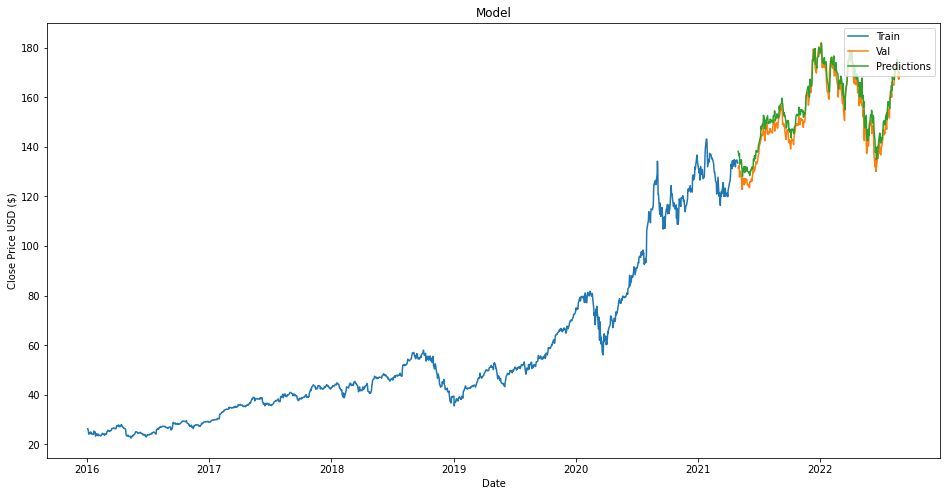

In [8]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [9]:
np.concatenate((y_test.reshape(len(y_test),1),predictions.reshape(len(predictions),1)),1)

array([[131.46000671, 138.22059631],
       [132.53999329, 136.37290955],
       [127.84999847, 137.32009888],
       [128.1000061 , 133.00917053],
       [129.74000549, 133.17510986],
       [130.21000671, 134.51327515],
       [126.84999847, 134.77952576],
       [125.91000366, 131.75453186],
       [122.76999664, 130.973526  ],
       [124.97000122, 128.04864502],
       [127.44999695, 129.86257935],
       [126.26999664, 131.99963379],
       [124.84999847, 130.85667419],
       [124.69000244, 129.70497131],
       [127.30999756, 129.64031982],
       [125.43000031, 132.00360107],
       [127.09999847, 130.21844482],
       [126.90000153, 131.8263855 ],
       [126.84999847, 131.67848206],
       [125.27999878, 131.64930725],
       [124.61000061, 130.2570343 ],
       [124.27999878, 129.64553833],
       [125.05999756, 129.28216553],
       [123.54000092, 129.90917969],
       [125.88999939, 128.46014404],
       [125.90000153, 130.61224365],
       [126.73999786, 130.603302  ],
 

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error

r2_score(y_test, predictions)

0.9196603698869474

In [11]:
mean_absolute_error(y_test, predictions)

3.56764664335879